# **Project Name**    - Book Recommendation System



##### **Project Type**    - Capstone - End to End Machine Learning (Unsupervised Learning)
##### **Contribution**    - Individual
##### **Team Member**     - AKASH KUNDU

# **Project Summary -**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant.

items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Need to built a **Recommender System** for books. Whith the help of this system any website can recommend the books to their user accound to the behaviour of the user. Like,
1.   Book which the most likily to read
2.   Books based on the geners which is mostely read

Which macke the user experiance better and help the website to grow more.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***


*   Data have three seprate file **Books, Users, Ratings**.
*   **Books** Dataset contain information about books such as booksname, ISBN number, author, image url etc.
*   **Users** dataset contain the information about users who read or bought the books like their ID, Age, Location.
*   **Ratings** Dataset contain information about the ratings given by the readers to a book like userID, ISBN, Ratings.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [90]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset
books = pd.read_csv('/content/drive/MyDrive/Capstone DataSet/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Capstone DataSet/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Capstone DataSet/Ratings.csv')

<ipython-input-3-68f70b18ed52>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Capstone DataSet/Books.csv')


### Dataset First View

In [4]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(books.shape)
print('------------------------')
print(users.shape)
print('------------------------')
print(ratings.shape)

(271360, 8)
------------------------
(278858, 3)
------------------------
(1149780, 3)


### Dataset Information

In [8]:
# Dataset Info
print(books.info())
print('--------------------------------------------------------------------------------------')
print(users.info())
print('--------------------------------------------------------------------------------------')
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
--------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-n

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(books.duplicated().sum())
print('------------------------')
print(users.duplicated().sum())
print('------------------------')
print(ratings.duplicated().sum())

0
------------------------
0
------------------------
0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(books.isna().sum())
print('-----------------------------------')
print(users.isna().sum())
print('-----------------------------------')
print(ratings.isna().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
-----------------------------------
User-ID          0
Location         0
Age         110762
dtype: int64
-----------------------------------
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


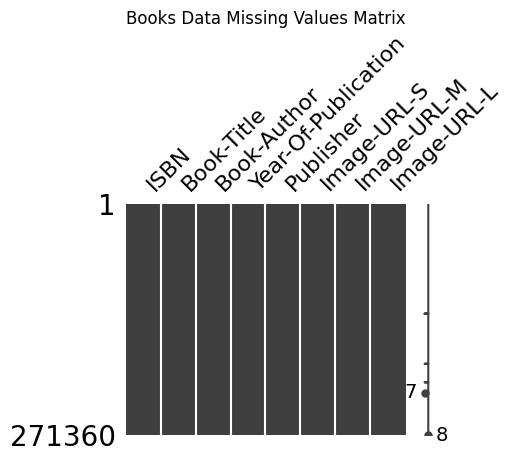

In [11]:
# Visualizing the missing values
msno.matrix(books, figsize=(4, 3))
plt.title('Books Data Missing Values Matrix')
plt.show()

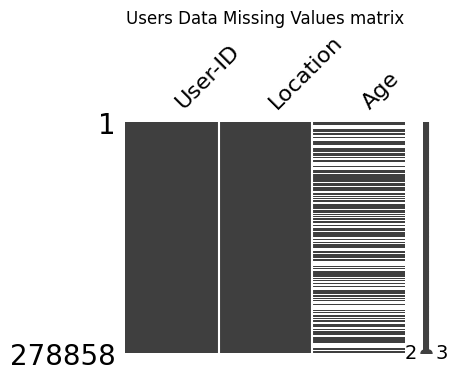

In [12]:
msno.matrix(users, figsize=(4, 3))
plt.title('Users Data Missing Values matrix')
plt.show()

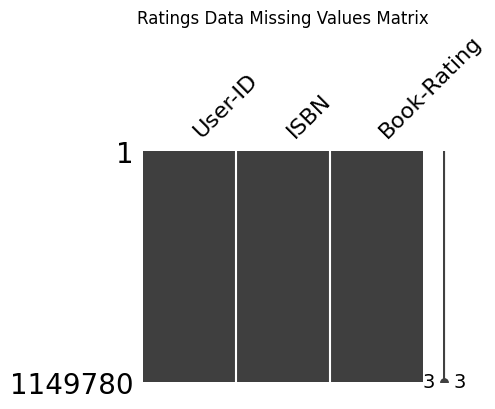

In [13]:
msno.matrix(ratings, figsize=(4, 3))
plt.title('Ratings Data Missing Values Matrix')
plt.show()

### What did you know about your dataset?



*   Data have three seprate file **Books, Users, Ratings**.
*   **Books** Dataset contain information about books such as booksname, ISBN number, author, image url etc.
*   **Users** dataset contain the information about users who read or bought the books like their ID, Age, Location.
*   **Ratings** Dataset contain information about the ratings given by the readers to a book like userID, ISBN, Ratings.
*   Maximum number of missing data available in **Users** in **Age** column about 95%.
*   Shape of dataset is books(271360, 8), users(278858, 3), ratings(1149780, 3).
*   Their is no dublicated values available in any dataset.
















## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print(books.columns)
print('--------------------------------------------------------------------------------------')
print(users.columns)
print('--------------------------------------------------------------------------------------')
print(ratings.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
--------------------------------------------------------------------------------------
Index(['User-ID', 'Location', 'Age'], dtype='object')
--------------------------------------------------------------------------------------
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [15]:
# Dataset Describe
print(books.describe())
print('--------------------------------------------------------------------------------------')
print(users.describe())
print('--------------------------------------------------------------------------------------')
print(ratings.describe())

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271359               271360   
unique      271360          242135           102023                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq          

### Variables Description

**Books**
*   ISBN - Contain Books serial number
*   Book-title - Contain Book name
*   Book-Author - Writer of the book
*   Year-Of-Publication - The year in which book Publish
*   Publisher - Name of the publisher of the book

**Users**

*   User-ID - Unique Id for each user
*   Location - Location of the reader
*   Age - Age of the reader

**Ratings**


*   User-ID - Unique Id for each user
*   ISBN - Contain Books serial number
*   Book-Rating - Ratings given by the reader after reading the books

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
print(books['ISBN'].unique())
print(books['Book-Title'].unique())
print(books['Book-Author'].unique())
print(books['Year-Of-Publication'].unique())
print(books['Publisher'].unique())
print('-------------------------------------------------------------------------------------------------------------')
print(users['User-ID'].unique())
print(users['Location'].unique())
print(users['Age'].unique())
print('-------------------------------------------------------------------------------------------------------------')
print(ratings['ISBN'].unique())
print(ratings['Book-Rating'].unique())
print(ratings['User-ID'].unique())


['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 190

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
#Rename the column and drop unnessary column from all dataset for the feature engineering
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
books.head(2)

<ipython-input-17-60574dcd7501>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)


,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [18]:
users.rename(columns={'User-ID':'user_id', 'Location':'location', 'Age':'age'},inplace=True)
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [19]:
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True)
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

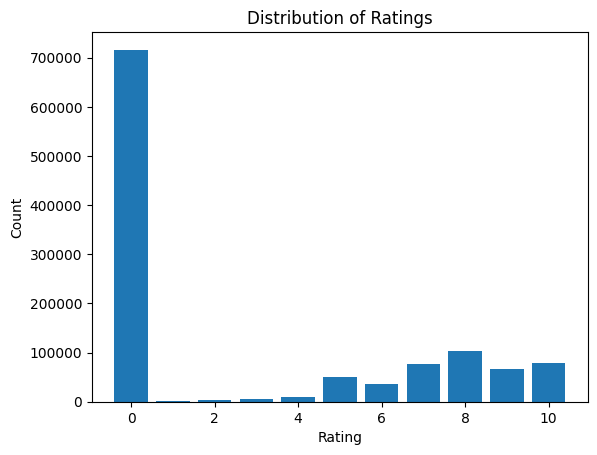

In [20]:
# Get the rating counts for each book
rating_counts = ratings['rating'].value_counts()

# Create a bar chart of the rating counts
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()



##### 1. Why did you pick the specific chart?

I chose the histogram because it is a good way to visualize the distribution of a single variable.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the majority of ratings are in the 4-5 star range, with a smaller number of ratings in the 1-3 star range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can be used to create a positive business impact by focusing on improving the quality of books that are rated 1-3 stars. This could lead to an increase in sales and customer satisfaction.

No, there are no insights that lead to negative growth.

## ***6. Feature Engineering & Data Pre-processing***

#### What all missing value imputation techniques have you used and why did you use those techniques?

We no need to handle the missing values because the dataset where the most of the missing values present i.e. **Users[Age]** is not require for the recomendations.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [34]:
# Selecting the users which rate atlest 200 books to get quality data
rating_200 = ratings['user_id'].value_counts()>200

In [35]:
user_rating = rating_200[rating_200].index

In [36]:
user_rating  #user_id of those user who rate atlest 200 books

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [37]:
ratings = ratings[ratings['user_id'].isin(user_rating)]
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [38]:
ratings.shape

(526356, 3)

In [39]:
#now mearging this rating data with books data to get the name of the books using common column ISBN
books_with_rating = ratings.merge(books, on = 'ISBN')
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [40]:
books_with_rating.shape #shape of data reduce beacouse the books are not available in dataset on which atlest 200 user rate

(487671, 7)

In [41]:
#now select only those books on which the number of rating is atlest 50
count_ratings = books_with_rating.groupby('title')['rating'].count().reset_index()
count_ratings.rename(columns={'rating':'No._of_rating'},inplace=True)
final_rating_data = books_with_rating.merge(count_ratings, on='title')
final_rating_data.head()

,user_id,ISBN,rating,title,author,year,publisher,No._of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [42]:
final_rating_data.shape

(487671, 8)

In [43]:
#now select only those books on which the number of rating is atlest 50
final_rating_data = final_rating_data[final_rating_data['No._of_rating'] >= 50]

In [44]:
final_rating_data.shape #data is drastically reduce as in this data we only have those books on which atlest 200 user rate and atlest 50 rating per book

(61853, 8)

In [45]:
#removing all the duplicate data from this dataset
final_rating_data.drop_duplicates(['user_id','title'],inplace = True)
final_rating_data.shape

<ipython-input-45-15006ea7bfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rating_data.drop_duplicates(['user_id','title'],inplace = True)


(59850, 8)

#### 2. Feature Selection

In [46]:
#Creating a piviot table of user_id, book title and values that it contain is ratings
books_pivot = final_rating_data.pivot_table(columns='user_id', index = 'title', values='rating')
books_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [47]:
#fill all null values with zero
books_pivot.fillna(0,inplace = True)
books_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
'''Here we have to find the distance between the features but as we have many zeros in this so if we are going to calculate the distace from
above povit table our computational complexity increase unnesseary.
So insted of finding distance from pivot table what we do we change the pivot table to sparce matrix which eleminate the all zeros.'''
book_sparce_matrix = csr_matrix(books_pivot)
type(book_sparce_matrix)

scipy.sparse._csr.csr_matrix

##### What all feature selection methods have you used  and why?

Here we have to find the distance between the features but as we have many zeros in this so if we are going to calculate the distace from
above povit table our computational complexity increase unnesseary.
So insted of finding distance from pivot table what we do we change the pivot table to sparce matrix which eleminate the all zeros.

## ***7. ML Model Implementation***

### **Popularity Based Recommender System**

Implemating **Popularity Based Recommmendation System** based on the popularity of the books using average rating and count of rating.

In [49]:
#finding average rating of each books and mearge them to the count_rating table
ratings_with_name = ratings.merge(books,on='ISBN')
num_rating_df = ratings_with_name.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
avg_rating_df = ratings_with_name.groupby('title').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating_df

<ipython-input-49-0fdedace3089>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('title').mean()['rating'].reset_index()


,title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4.5
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,Beyond IBM: Leadership Marketing and Finance ...,0.0
4,Clifford Visita El Hospital (Clifford El Gran...,0.0
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,0.0
160265,Ã?Â?lpiraten.,0.0
160266,Ã?Â?rger mit Produkt X. Roman.,8.0
160267,Ã?Â?stlich der Berge.,0.0


In [50]:
popular_books = num_rating_df.merge(avg_rating_df,on='title')
popular_books

,title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2,4.5
1,Always Have Popsicles,1,0.0
2,Apple Magic (The Collector's series),1,0.0
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.0
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.0
...,...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3,0.0
160265,Ã?Â?lpiraten.,1,0.0
160266,Ã?Â?rger mit Produkt X. Roman.,1,8.0
160267,Ã?Â?stlich der Berge.,1,0.0


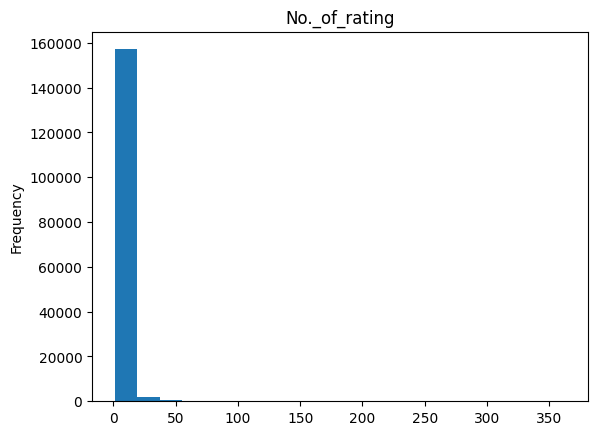

In [51]:
# number of rating per books
popular_books['num_ratings'].plot(kind='hist', bins=20, title='No._of_rating')
plt.show()

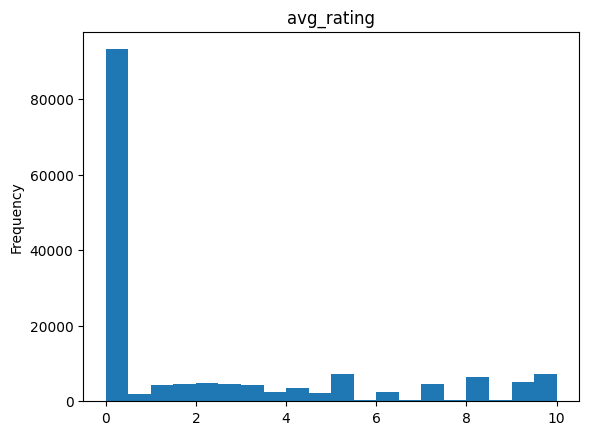

In [52]:
# Average Rating
popular_books['avg_rating'].plot(kind='hist', bins=20, title='avg_rating')
plt.show()

In [53]:
#Top 50 books which have highest avg_rating and have atlest 250 user rating
popular_books = popular_books[popular_books['num_ratings']>=250].sort_values('avg_rating', ascending=False).head(50)
popular_books = popular_books.merge(books,on='title').drop_duplicates('title')[['title','author','num_ratings','avg_rating']]
popular_books

,title,author,num_ratings,avg_rating
0,The Lovely Bones: A Novel,Alice Sebold,270,3.203704
1,Bridget Jones's Diary,Helen Fielding,277,2.664260
7,Wild Animus,Rich Shapero,363,0.438017


These are the top 3 books which we can recommend to any user every time because these are the books which are the most populer amongest the user.

Their is no Evaluation metric for popularity based recommendation system for now becouse to find the performance of the recommendation we need **Click Through Rate** which we can only get when model is live for the user.

### **Collaborative Filtering Based Recommender System**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML model used **Collaborative Filtering** which used the concept of finding the similarity between books by finding the **euclidean distance** between the vectors which is generated by each book and the find the **Cosine Similarity**.

We recommend Top 5 books to the reader whose Cosine similarity score is maximum.

In [54]:
# Finding the cosine similarity of the books
similarity_score = cosine_similarity(books_pivot)
similarity_score[0]

array([1.        , 0.07624004, 0.        , 0.        , 0.07311041,
       0.03592254, 0.        , 0.0720444 , 0.09844858, 0.        ,
       0.        , 0.        , 0.06357987, 0.        , 0.06052731,
       0.0184244 , 0.0631735 , 0.09360361, 0.04554309, 0.08528621,
       0.02292759, 0.        , 0.08992788, 0.        , 0.12558027,
       0.07016405, 0.05554746, 0.06322522, 0.        , 0.04925827,
       0.10706361, 0.0571246 , 0.10238571, 0.06000764, 0.05101252,
       0.        , 0.        , 0.06576001, 0.03915011, 0.        ,
       0.        , 0.09079097, 0.07599253, 0.        , 0.        ,
       0.05612309, 0.10585073, 0.        , 0.03106666, 0.07276544,
       0.06663565, 0.07310003, 0.02892988, 0.04970874, 0.26347625,
       0.10084817, 0.08304715, 0.10808221, 0.10651024, 0.06877653,
       0.03882237, 0.        , 0.        , 0.03512102, 0.        ,
       0.05326136, 0.0338294 , 0.17941454, 0.        , 0.        ,
       0.        , 0.03714664, 0.09521457, 0.12490485, 0.     

In [55]:
#Create a Function for the Recommendation
def recommenter(book_name):
  #featch index
  index = np.where(books_pivot.index == book_name)[0][0]
  #finding Distance
  distance = sorted(list(enumerate(similarity_score[index])), key = lambda x:x[1], reverse=True)[1:6]

  #loop to featch the name of recommended books
  for i in distance:
    print(books_pivot.index[i[0]])

In [56]:
recommenter("To Kill a Mockingbird")

The Catcher in the Rye
Lord of the Flies
Five Quarters of the Orange
The Bean Trees
Empire Falls


### Clustring Based Recommendation System

**Clustring Based Recommendation System** is used clustring algorithm. By this we find the Nearest neighbour of each books and form the cluster of least distance datapoints and then recommend the books on the bases of the cluster.

In [57]:
# Here we find the nearest neighbour from the sparse matrix which we already calculated
cluster_model = NearestNeighbors(algorithm='brute')

#Fit the model
cluster_model.fit(book_sparce_matrix)

NearestNeighbors(algorithm='brute')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Model predictions
distances, suggestions = cluster_model.kneighbors(books_pivot.iloc[237, :].values.reshape(1,-1), n_neighbors = 6)

This gives us the distances and suggestion of the similar cluster.

Distances means distance from nearest books.

Suggestion means the ID of the books which is most likily recommended.

In [59]:
print(distances)
print('--------------------------------------------------------------------------------------------------')
print(suggestions)

[[ 0.         68.78953409 69.5413546  72.64296249 76.83098333 77.28518616]]
--------------------------------------------------------------------------------------------------
[[237 240 238 241 184 536]]


In [60]:
#initial suggestion
for i in range(len(suggestions)):
  print(books_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [61]:
#recommender system function
def book_recommender(name):
  book_id = np.where(books_pivot.index == name)[0][0]
  distances, suggestions = cluster_model.kneighbors(books_pivot.iloc[book_id, :].values.reshape(1,-1), n_neighbors = 6)
  for i in range(len(suggestions)):
    print(books_pivot.index[suggestions[i]])

In [62]:
book_recommender('1984')

Index(['1984', 'No Safe Place', 'A Civil Action', 'Foucault's Pendulum',
       'Long After Midnight', 'Abduction'],
      dtype='object', name='title')


##### Which hyperparameter optimization technique have you used and why?

We can use n_neighbors as a hyperparameter. Because it determines the numbers of neighbour which form the cluster.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, if the n_neighbors is very low then it will led to underfit and if it is too high then led overfitting. So it should be optimum.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Collabrative Filtring** Because it give me far good result due to the way it find the result by finding cosine similerity from each book which give the far good result.

# **Conclusion**

*   At first we found large number of null value found in Users dataset['Age'] column but when we move forword we found that their is no need for this dataset to build out model. So, their is no need for impution of these null values.
*   We do some Transformation like lower case for all column name and remove unnessesary column so that we can used the in analysis.
*   We develop three model for the perticular problem like,
    1.   Popularity based recommendation System
    2.   Collaborative filtering based recommendation System
    3.   Clustring based recommendation System

  from all above recomender system we found collaborative filtering is the best suited.

*   We recommended 5 books to each reader so that he/she can read qulity content and the content which they like the most.





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***